# 颜色设置

seaborn中color_palette()函数是最重要的创建离散调色板的函数。这个函数提供了许多种方式来创建调色板，并且许多接受palette参数的绘图函数内部都是使用这种方式来创建调色板。

color_palette()接受的参数类型包括matplotlib中的所有的colormap（除了jet）、matplotlib支持的颜色列表（RGB元组、十六进制颜色编码、HTML颜色名）。它的返回值都是类型为RGB元组的列表。

调用不带参数的color_palette()返回当前使用的颜色系统。

通常在数据集的特点未知的情况下哪一种palette或者colormap最适合是几乎不可能知道的。

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## 定性调色板

如果不同的离散数据块之间没有内在的排序关系，定性（分类）调色板是最好的选择。

seaborn中内置了6中颜色主题：deep、muted、pastel、bright、dark和colorbind。

![image](./color_palettes_8_0.png)

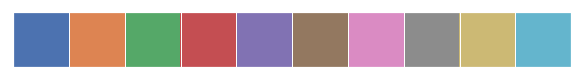

In [2]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

### 使用圆形颜色系统

如果需要使用颜色无差别的区分任意数量的分类数，最简单的方式在一个圆形色彩空间内以均匀的间隔选取颜色（固定亮度和饱和度，改变色调）。这是seaborn中大部分函数的默认方式当需要的颜色数量超过当前默认的颜色主题中定义的颜色。

最常用的方式是使用hls彩色空间。

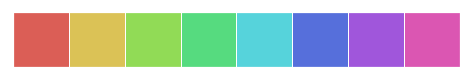

In [3]:
sns.palplot(sns.color_palette("hls", 8))

也可以通过hls_palette()函数设置亮度和饱和度。

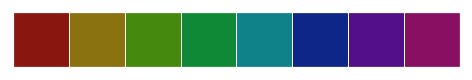

In [4]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8))

然而，由于人的视觉系统对相同强度的色彩感受到的强度时不同。通常黄色和绿色比蓝色看起来更加明亮，这样会造成hls颜色空间中相同亮度的颜色看起来不太一致。

seaborn中提供了husl颜色系统的借口，可以使得选择的颜色在亮度和饱和度上看起来更加的一致。

husl_palette()函数提供了比color_palette()函数更加灵活的接口。

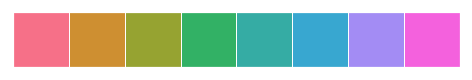

In [5]:
sns.palplot(sns.color_palette("husl", 8))

### 使用分类的Brewer调色板

在seaborn中，如果调用定性的分类Brewer调色板，将会得到一些离散的颜色值。

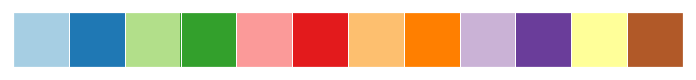

In [6]:
sns.palplot(sns.color_palette("Paired"))

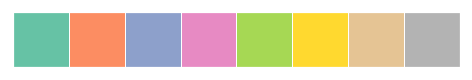

In [7]:
sns.palplot(sns.color_palette("Set2"))

color_palette()也可以通过颜色列表生成调色板。

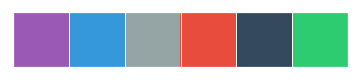

In [8]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

### 使用xkcd中的命名颜色

通过xkcd_rgb字典可以使用xkcd中命名的954中色彩。

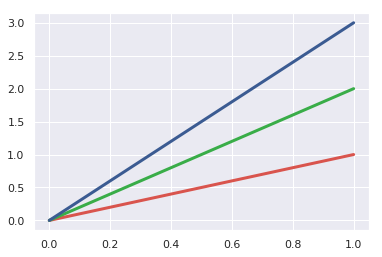

In [9]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3);

除了使用skcd_rgb字典获取颜色，也可以使用xkcd_palette()函数一次获取多种颜色

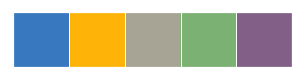

In [10]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

## 序列调色板

序列调色板适用于从相对低到高或者从不感兴趣到感兴趣变化的数据。对于序列数据，最好使用色调轻微变化，但是饱和度和亮度具有较大变化的调色板。

在Brewer色彩库中内置了大量调色板集合，他们以调色板中的主色调命名。

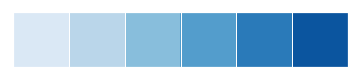

In [11]:
sns.palplot(sns.color_palette("Blues"))

与matplotlib类似，如果需要亮度反序，则在对应的名字后面加上“_r”后缀。

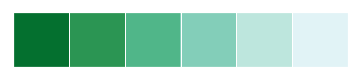

In [12]:
sns.palplot(sns.color_palette("BuGn_r"))

Seabn还增加了一个技巧，允许你创建“黑暗”调色板，它的动态范围较窄。如果想要顺序地绘制线或点，这可能是有用的，因为鲜艳的线条可能很难区分。

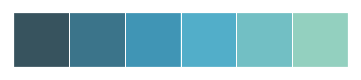

In [13]:
sns.palplot(sns.color_palette("GnBu_d"))

### cubehelix调色板

cubehelix调色板系统使用亮度线性增加或减少和几个不同色调生成调色板。matplotlib中有默认的cubehelix版本。

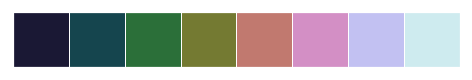

In [14]:
sns.palplot(sns.color_palette("cubehelix", 8))

seborn中为cubehelix调色板系统增加了一些接口，以便用户能够获得各种各样具有较好亮度线性下降的调色板。

cubehelix_palette()函数返回的默认调色板与matplotlib默认调色板是不同的。前者的色调范围变化较少，并且亮度也是相反的。

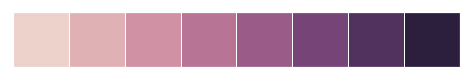

In [15]:
sns.palplot(sns.cubehelix_palette(8))

cubehelix_palette()函数的其他参数控制调色变的样式。其中最常用的两个参数是start(0-3中的值)和rot(-1到1之间的任意值)。

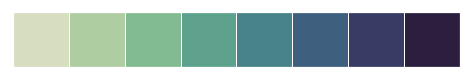

In [16]:
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

可以设置亮度的起始值，也可以翻转亮度。

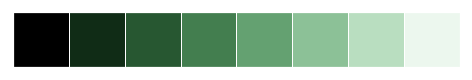

In [17]:
sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))

默认情况下这些函数返回的是颜色列表，但可以设置参数as_cmap=True，使得返回结果为colormap。

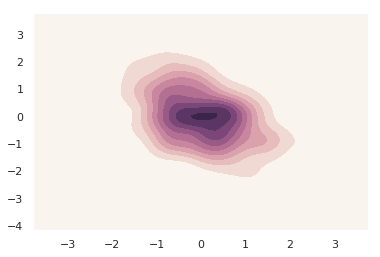

In [18]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True)

### 自定义序列调色板

seaborn中提供了light_palette()和dark_palette()函数来生成自定义序列调色板。这两个函数接受一个单一颜色的种子，生成从最亮或者最暗饱和值到那个颜色的调色板。

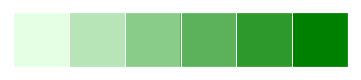

In [19]:
sns.palplot(sns.light_palette("green"))

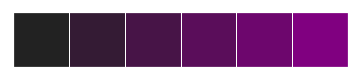

In [20]:
sns.palplot(sns.dark_palette("purple"))

reverse参数可以使颜色反序

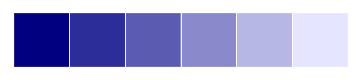

In [21]:
sns.palplot(sns.light_palette("navy", reverse=True))

as_cmap参数可以返回colormap

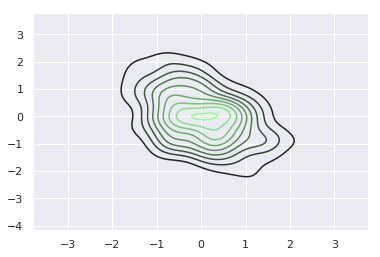

In [22]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x, y, cmap=pal)

种子可以是任何合法的matplotlib颜色，类型与input参数对应。可以是hsl、husl、rgb色彩空间对应的元组，也可以是xckd空间对应的颜色名。

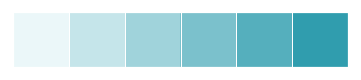

In [23]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

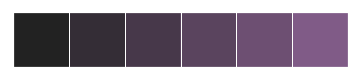

In [24]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

## 发散调色板

发散调色板适用于数据中极大值和极小值都是感兴趣值的情况下。发散调色板的选择与序列调色板的选择类似。不同之处时发散调色板有两个色调的起始变化值，并且在中间相遇。除此之外，起始值具有相似的饱和度和亮度。

Brewer颜色库定义一些发散调色板集合。

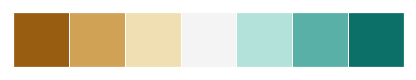

In [25]:
sns.palplot(sns.color_palette("BrBG", 7))

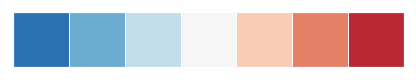

In [26]:
sns.palplot(sns.color_palette("RdBu_r", 7))

另一个选择时使用matplotlib的coolwarm调色板。但是这个colormap中间值和两端值对比并不强烈。

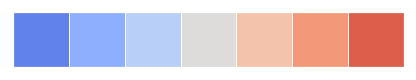

In [27]:
sns.palplot(sns.color_palette("coolwarm", 7))

### 自定义发散调色板

利用diverging_palette()函数可以自定义发散调色板。这个函数使用husl颜色空间，它需要两个色调参数，极值的亮度和饱和度是可选参数。

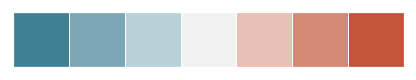

In [28]:
sns.palplot(sns.diverging_palette(220, 20, n=7))

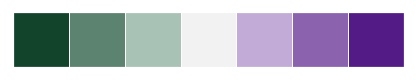

In [29]:
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))

seq参数用于设置相邻两个颜色的下降的区间

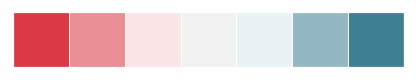

In [30]:
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7))

center参数用于设置中间值

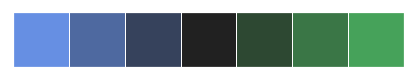

In [31]:
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

## 设置默认调色板

set_palette()参数与color_palette()相同，但它用来设置matplotlib的默认参数值。

In [32]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

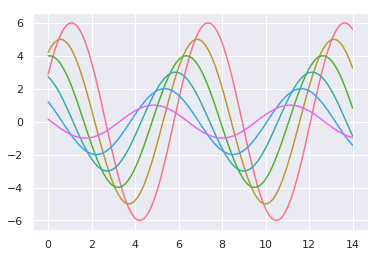

In [33]:
sns.set_palette("husl")
sinplot()

color_palette()函数也可以用于with语句来临时改变参数

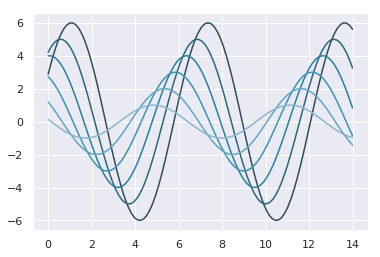

In [34]:
with sns.color_palette("PuBuGn_d"):
    sinplot()